In [240]:
# To import the google drive

from google.colab import drive

# To mount the drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [241]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [242]:
# Libraries to help load and manipulate the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library to help build the keras sequential model

import tensorflow as tf

# To import all the different layers and optimizer

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

In [243]:
# To load and read the labels data

labels = pd.read_csv(r"/content/drive/MyDrive/Labels-1.csv")
labels


,Label
0,nilgiri_langur
1,nilgiri_langur
2,nilgiri_langur
3,nilgiri_langur
4,nilgiri_langur
...,...
1337,bald_uakari
1338,bald_uakari
1339,bald_uakari
1340,bald_uakari


In [244]:
# To load and read the images data

images= np.load("/content/drive/MyDrive/Pius Documents/google colab/images-1.npy")
images

array([[[[ 59,  63,  52],
         [ 66,  70,  59],
         [ 69,  73,  62],
         ...,
         [108, 112, 117],
         [102, 106, 111],
         [110, 114, 115]],

        [[ 57,  62,  47],
         [ 66,  68,  60],
         [ 68,  74,  58],
         ...,
         [126, 133, 135],
         [116, 122, 130],
         [135, 138, 143]],

        [[ 55,  60,  45],
         [ 63,  67,  57],
         [ 68,  71,  63],
         ...,
         [ 98, 105, 108],
         [104, 110, 118],
         [ 99, 110, 115]],

        ...,

        [[ 92,  86,  79],
         [ 91,  85,  78],
         [ 88,  85,  77],
         ...,
         [120, 122, 122],
         [119, 121, 121],
         [115, 115, 115]],

        [[ 93,  87,  80],
         [ 91,  86,  78],
         [ 89,  83,  76],
         ...,
         [105, 107, 107],
         [113, 115, 115],
         [116, 116, 116]],

        [[ 91,  85,  78],
         [ 89,  83,  76],
         [ 89,  83,  76],
         ...,
         [ 97,  99,  99],
        

In [245]:
# Library to help split data into train and test data

from sklearn.model_selection import train_test_split
train_images,test_images, train_labels, test_labels = train_test_split(images, labels)


In [246]:
# To check the dimension of the training images

train_images.shape

(1006, 128, 128, 3)

- The data is stored in a 4-dimensional NumPy Array. There are 1006 number of images in the training data, 128 number of pixels along the x-axis and 128 number of pixels along the y-axis, 3 is the total number of colour channels (Red, Green Blue Dimensions) in the images.

In [247]:
# To check the dimension of the test images

test_images.shape

(336, 128, 128, 3)

There are 336 number of images in the test data, 128 number of pixels along the x-axis and 128 number of pixels along the y-axis, 3 is the total number of colour channels (Red, Green Blue Dimensions) in the images.

In [248]:
# To know the dimension of the training labels

train_labels.shape

(1006, 1)

- The train label is 1006 by 1 dimension

In [249]:
# To know the dimension of the test labels

test_labels.shape

(336, 1)

- The test label is 336 by 1 dimension

In [250]:
# To check one of the images

train_images[2]

array([[[ 79, 118,  92],
        [ 81, 122,  95],
        [ 82, 124, 101],
        ...,
        [ 54, 116,  94],
        [ 54, 116,  94],
        [ 54, 116,  92]],

       [[ 71, 109,  87],
        [ 76, 114,  92],
        [ 80, 119,  97],
        ...,
        [ 56, 115,  94],
        [ 55, 115,  93],
        [ 53, 117,  92]],

       [[ 64,  98,  81],
        [ 69, 106,  84],
        [ 74, 113,  92],
        ...,
        [ 56, 115,  94],
        [ 54, 117,  95],
        [ 54, 116,  94]],

       ...,

       [[ 46,  77,  92],
        [ 10,  33,  46],
        [ 23,  47,  62],
        ...,
        [ 49, 103,  90],
        [ 50, 108,  91],
        [ 50, 116,  97]],

       [[  2,  19,  26],
        [  9,  31,  37],
        [  5,  29,  35],
        ...,
        [ 49, 102,  88],
        [ 52, 108,  95],
        [ 49, 114,  95]],

       [[  7,  23,  31],
        [  6,  29,  30],
        [ 22,  43,  41],
        ...,
        [ 48, 102,  89],
        [ 50, 106,  93],
        [ 48, 115,  96]]

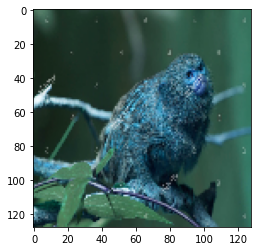

In [251]:
# To show one of the images

plt.imshow(train_images[2])

# Plot of the images from each class 

In [252]:
num_classes = 12

# creating a list of category names in alphabetical order
seedling12_classes = ["Black_grass", "Charlock", "Cleavers", "Common_Chickweed", "Common_Wheat", "Fat_Hen", "Loose_Silky-bent", "Maize",
                   "Scentless_Mayweed", "Shepherds_Purse", "Small_flowered_Cranesbill", "Sugar_beet"]

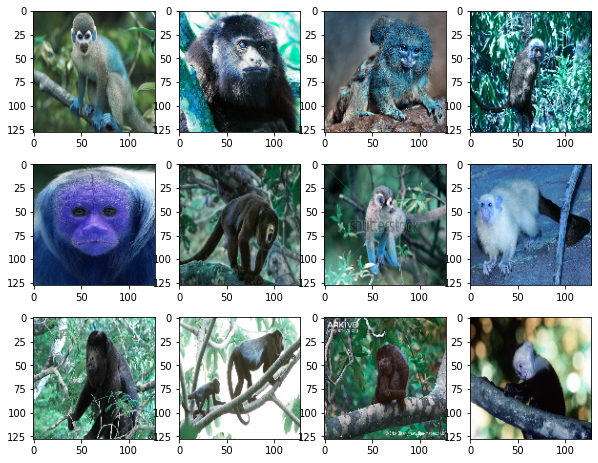

In [253]:
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 8))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(train_labels))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(train_images[random_index, :])
       # ax.set_title(seedling12_classes[train_labels[random_index, 0]])
plt.show()

In [254]:
# To check the data types of the images

train_images.dtype

dtype('uint8')

- The data type is unsigned integer

# Data Preprocessing

In [255]:
# To convert the data types and normalize the images

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [256]:
# To create one-hot encoded representation for the labels

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
train_labels_encoded = enc.fit_transform(train_labels)
test_labels_encoded = enc.transform(test_labels)

In [257]:
# To check the dimension of the labels

train_labels_encoded.shape

(1006, 10)

- It is now 1006 by 10 dimensions

# The network architecture

In [258]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [259]:
# To instantiate the sequential model

model = Sequential()

# Add first conv layer with 64 filters and 3*3 kernel size, padding "same" provides the same ouput as the input size,"relu" as activation 

model.add(Conv2D(64, (3,3), padding = "same", activation = "relu", input_shape = (128, 128, 3)))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model.add(BatchNormalization())

# Add the second conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model.add(BatchNormalization())


# Add the third conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model.add(BatchNormalization())

# Flattening the output of conv layer after max pooling to make it ready for dense connections
model.add(Flatten())

# Add a fully connected dense layer with 64 neurons
model.add(Dense(64, activation ="relu"))

# Add the output layer with 10 neurons with softmax as activation function as this is a multi_class classification problem
model.add(Dense(10, activation ="softmax"))



# To compile the model

In [260]:
# To compile the model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [261]:
# To check the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

- There are 553,018 parameters produced by the model

# To train the model

In [262]:
history = model.fit(train_images, train_labels_encoded, epochs =5, batch_size =128, validation_split=0.2)

Epoch 1/5
7/7 [==============================] - 2s 135ms/step - loss: 2.2059 - accuracy: 0.3172 - val_loss: 2.2716 - val_accuracy: 0.1535
Epoch 2/5
7/7 [==============================] - 1s 91ms/step - loss: 0.7147 - accuracy: 0.7512 - val_loss: 2.2973 - val_accuracy: 0.1337
Epoch 3/5
7/7 [==============================] - 1s 89ms/step - loss: 0.3242 - accuracy: 0.9017 - val_loss: 2.5169 - val_accuracy: 0.0941
Epoch 4/5
7/7 [==============================] - 1s 88ms/step - loss: 0.1172 - accuracy: 0.9764 - val_loss: 2.6943 - val_accuracy: 0.1139
Epoch 5/5
7/7 [==============================] - 1s 84ms/step - loss: 0.0441 - accuracy: 0.9988 - val_loss: 2.9315 - val_accuracy: 0.1337


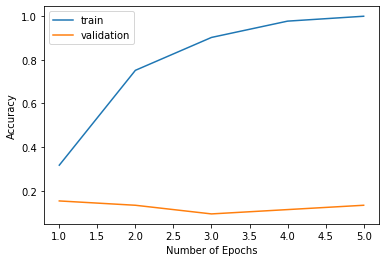

In [263]:
# To visualise the model's performance

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label = "train")
plt.plot(epochs, val_acc, label = "validation")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

In [264]:
# To evaluate model on test set

model.evaluate(test_images, test_labels_encoded)

11/11 [==============================] - 0s 14ms/step - loss: 2.9252 - accuracy: 0.1637


[2.9251604080200195, 0.1636904776096344]

- The test performance gives 2.9 loss and 16% accuracy

# To imporve the model's performances

In [265]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [266]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [267]:
# To instantiate the sequential model

model2 = Sequential()

# Add first conv layer with 32 filters and 3*3 kernel size, padding "same" provides the same ouput as the input size,"relu" as activation 

model2.add(Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape = (128, 128, 3)))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model2.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model2.add(BatchNormalization())

# Add the second conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model2.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model2.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model2.add(BatchNormalization())


# Add the third conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model2.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model2.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model2.add(BatchNormalization())

# Flattening the output of conv layer after max pooling to make it ready for dense connections
model2.add(Flatten())

# Add a fully connected dense layer with 64 neurons
model2.add(Dense(64, activation ="relu"))

# Add dropout layer
model2.add(Dropout(0.25))

# Add another fully connected dense layer with 64 neurons
model2.add(Dense(64, activation ="relu"))

# Add another dropout layer
model2.add(Dropout(0.25))

# Add another fully connected dense layer with 64 neurons
model2.add(Dense(64, activation ="relu"))

# Add another dropout layer
model2.add(Dropout(0.25))

# Add the output layer with 10 neurons with softmax as activation function as this is a multi_class classification problem
model2.add(Dense(10, activation ="softmax"))


In [268]:
# To check the model summary

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

- There are 553,098 parameters produced by the model

In [269]:
# To compile the model
model2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [270]:
# To train the model

history2 = model2.fit(train_images, train_labels_encoded, epochs =8, batch_size =128, validation_split=0.2)

Epoch 1/8
7/7 [==============================] - 2s 160ms/step - loss: 2.3905 - accuracy: 0.1704 - val_loss: 2.2962 - val_accuracy: 0.1386
Epoch 2/8
7/7 [==============================] - 1s 86ms/step - loss: 2.1148 - accuracy: 0.2562 - val_loss: 2.3018 - val_accuracy: 0.1089
Epoch 3/8
7/7 [==============================] - 0s 66ms/step - loss: 1.8523 - accuracy: 0.3495 - val_loss: 2.2998 - val_accuracy: 0.1089
Epoch 4/8
7/7 [==============================] - 1s 81ms/step - loss: 1.6325 - accuracy: 0.4129 - val_loss: 2.2944 - val_accuracy: 0.1089
Epoch 5/8
7/7 [==============================] - 1s 77ms/step - loss: 1.4387 - accuracy: 0.5037 - val_loss: 2.2884 - val_accuracy: 0.1089
Epoch 6/8
7/7 [==============================] - 1s 75ms/step - loss: 1.2062 - accuracy: 0.5808 - val_loss: 2.3120 - val_accuracy: 0.1188
Epoch 7/8
7/7 [==============================] - 1s 73ms/step - loss: 1.1461 - accuracy: 0.6144 - val_loss: 2.3541 - val_accuracy: 0.1089
Epoch 8/8
7/7 [==================

# To visualise the model2's performance

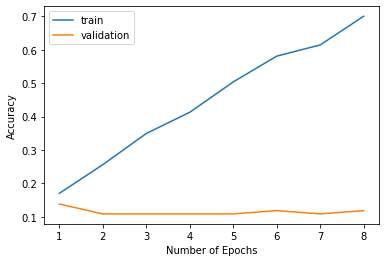

In [271]:
from IPython.core.history import HistoryAccessor
# To visualise the model2's performance

acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label = "train")
plt.plot(epochs, val_acc, label = "validation")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

In [272]:
# To evaluate model on test set

model2.evaluate(test_images, test_labels_encoded)

11/11 [==============================] - 0s 9ms/step - loss: 2.4222 - accuracy: 0.0714


[2.422226667404175, 0.0714285746216774]

- The test performance gives 2.4 loss and 7% accuracy

# Using early stopping to imporve the performance of the model

In [273]:
# To clear the backend
backend.clear_session()

In [274]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [275]:
# Library to import earlystopping

from tensorflow.keras.callbacks import EarlyStopping


In [276]:
# To create an instant of the early stopping

early_stopping = EarlyStopping(monitor="val_accuracy", patience= 6)

In [277]:
# To instantiate the sequential model

model3 = Sequential()

# Add first conv layer with 32 filters and 3*3 kernel size, padding "same" provides the same ouput as the input size,"relu" as activation 

model3.add(Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape = (128, 128, 3)))


# Add max pooling to reduce the output of first conv layer: pool_size of (2,2) and padding "same"
model3.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model3.add(BatchNormalization())

# Add the second conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model3.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of second conv layer: pool_size of (2,2) and padding "same"
model3.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model3.add(BatchNormalization())

# Add the third conv layer with 32 filters and 3*3 kernel size, padding "same","relu" as the activation function
model3.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))


# Add max pooling to reduce the output of third conv layer: pool_size of (2,2) and padding "same"
model3.add(MaxPooling2D())

# Add BatchNormalization to normalize the input
model3.add(BatchNormalization())

# Flattening the output of conv layer after max pooling to make it ready for dense connections
model3.add(Flatten())

# Add a fully connected dense layer with 64 neurons
model3.add(Dense(64, activation ="relu"))

# Add dropout layer
model3.add(Dropout(0.25))

# Add another fully connected dense layer with 64 neurons
model3.add(Dense(64, activation ="relu"))

# Add another dropout layer
model3.add(Dropout(0.25))

# Add the third fully connected dense layer with 64 neurons
model3.add(Dense(64, activation ="relu"))

# Add the third dropout layer
model3.add(Dropout(0.25))

# Add the output layer with 10 neurons with softmax as activation function as this is a multi_class classification problem
model3.add(Dense(10, activation ="softmax"))


In [278]:
# To check the model summary

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

- There are 553,098 parameters produced by the model

In [279]:
# To compile the model
model3.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [280]:
# To train the model

history3 = model3.fit(train_images, train_labels_encoded, epochs =15, batch_size =128, validation_split=0.2, callbacks=early_stopping)

Epoch 1/15
7/7 [==============================] - 4s 208ms/step - loss: 2.3905 - accuracy: 0.1692 - val_loss: 2.2961 - val_accuracy: 0.1287
Epoch 2/15
7/7 [==============================] - 1s 79ms/step - loss: 2.1248 - accuracy: 0.2463 - val_loss: 2.3026 - val_accuracy: 0.1089
Epoch 3/15
7/7 [==============================] - 1s 78ms/step - loss: 1.8458 - accuracy: 0.3644 - val_loss: 2.2977 - val_accuracy: 0.1139
Epoch 4/15
7/7 [==============================] - 1s 77ms/step - loss: 1.6873 - accuracy: 0.4179 - val_loss: 2.2981 - val_accuracy: 0.1337
Epoch 5/15
7/7 [==============================] - 0s 65ms/step - loss: 1.4389 - accuracy: 0.5199 - val_loss: 2.3021 - val_accuracy: 0.1089
Epoch 6/15
7/7 [==============================] - 0s 61ms/step - loss: 1.2462 - accuracy: 0.5734 - val_loss: 2.3310 - val_accuracy: 0.1188
Epoch 7/15
7/7 [==============================] - 0s 59ms/step - loss: 1.1400 - accuracy: 0.6281 - val_loss: 2.3964 - val_accuracy: 0.1584
Epoch 8/15
7/7 [==========

# To visualize the model3's performance

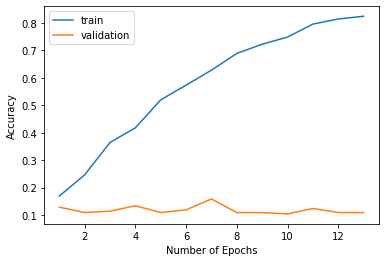

In [281]:
from IPython.core.history import HistoryAccessor
# To visualise the model2's performance

acc = history3.history["accuracy"]
val_acc = history3.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label = "train")
plt.plot(epochs, val_acc, label = "validation")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

In [282]:
# To evaluate model on test set

model3.evaluate(test_images, test_labels_encoded)

11/11 [==============================] - 0s 7ms/step - loss: 3.5369 - accuracy: 0.0685


[3.53686261177063, 0.0684523805975914]

- The test performance gives 3.5 loss and 6% accuracy

# Observations

- The first model with 64 neurons at first Conv2D layer, 555,018 total parameters produced. With epochs of 5, the accuracy jumped from 32% at epoch 1 to 75% at epoch 2 and finally to accuracy of 99.9% at epoch 5 with val_accuracy of 13% and loss of 4% at the same epoch 5. This model overfits.

- The second model with 32 neurons in all Con2D layers and more droupout layers, 553,098 parameters produced. With epochs of 15, the model achieved 70% accuracy, 91% loss and 12% val_accuracy. The model's perfomance improves.

- With earlystopping parameter using 32 neurons in all Con2D layers,
82% accuracy achieved at val_accuracy of 11% and loss of 52%.

The accuracy rating improves.